In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import random


local_zip = '/builds.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
# Directory with our training destroyed houses
train_dest_dir = os.path.join('/tmp/builds/train/Destroyed')

# Directory with our training normal houses
train_norm_dir = os.path.join('/tmp/builds/train/Normal')

# Directory with our test destroyed houses
validation_dest_dir = os.path.join('/tmp/builds/validation/destroyed')

# Directory with our test normal houses
validation_norm_dir = os.path.join('/tmp/builds/validation/normal')

In [ ]:
a = random.randint(1,20)
b = random.randint(20, 40)
train_norm_names = os.listdir(train_norm_dir)
print(train_norm_names[a:b])

train_dest_names = os.listdir(train_dest_dir)
print(train_dest_names[a:b])

['1ht.jpg', 'nick-romanov-_hw4aUQ81ic-unsplash.jpg', 'anastasia-dulgier-1aC2meIY8QY-unsplash.jpg', '676499_1585497084.jpg', 'annie-spratt-2WhUS1UVwus-unsplash.jpg', 'headway-nZNgmgWHj7Y-unsplash.jpg', 'IMG_0764.jpg', 'phil-hearing-GI2MzFJkkuc-unsplash.jpg', 'mr-autthaporn-pradidpong-EFV7e9r7Dfg-unsplash.jpg', '1496.jpg', '4779090.jpg', 'david-sam-levinson-JwpTHy9AxQc-unsplash.jpg', 'abby-zavgorodniaia-uOYak90r4L0-unsplash.jpg', 'derek-torsani-9gwPgCa8y-E-unsplash.jpg']
['Destroyed_building_in_Muzaffarabad_after_the_earthquake_(2005).jpg', 'GTY_sandy_damage_nt_130926_16x9_992.jpg', 'tornado-storm-damage-house-home-destroyed-wind-14895715.jpg', 'house-disaster.jpg', 'buildings_ruins_0009_05_preview.jpg', '1171855.580xp.jpg', 'destruction-house-damage-building.jpg', 'damaged-houses.jpg', '021237064-main.jpg', 'b15736c1d4d5a762aa01ab38d80a389e.jpg', 'unnamed (2).jpg', 'Destroyed_building_VRN.jpg', 'DSCN5774JPG.jpg', 'earthquakes-as-existential-risks.jpg']


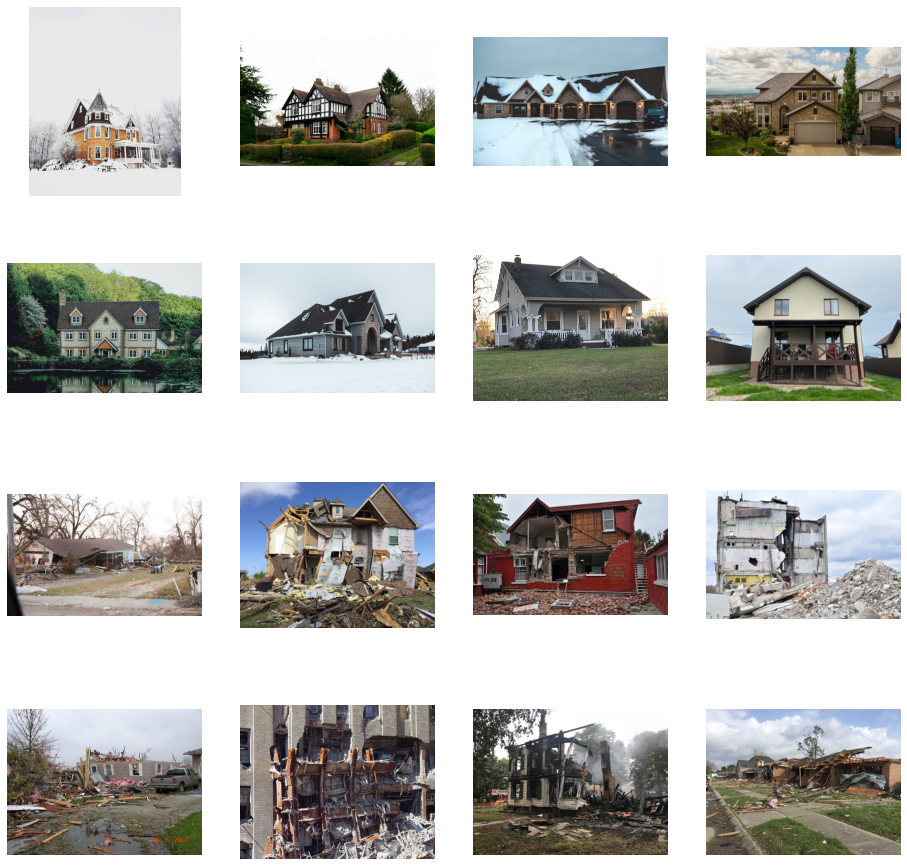

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = random.randint(1,20)

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_norm_pix = [os.path.join(train_norm_dir, fname) 
                for fname in train_norm_names[pic_index-8:pic_index]]
next_dest_pix = [os.path.join(train_dest_dir, fname) 
                for fname in train_dest_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_norm_pix+next_dest_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('dest') and 1 for the other ('norm')
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
#train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, 
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
                
validation_datagen = ImageDataGenerator(rescale=1/255.)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/builds/train',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 75x75
        batch_size=11,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/builds/validation',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 75x75
        batch_size=6,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 340 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [ ]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 30,
            epochs = 20,
            validation_steps = 16,
            verbose = 2)

Epoch 1/20
30/30 - 17s - loss: 0.6913 - accuracy: 0.5593 - val_loss: 0.6550 - val_accuracy: 0.5625
Epoch 2/20
30/30 - 17s - loss: 0.6756 - accuracy: 0.5745 - val_loss: 0.6593 - val_accuracy: 0.6042
Epoch 3/20
30/30 - 17s - loss: 0.6415 - accuracy: 0.6626 - val_loss: 0.6122 - val_accuracy: 0.6458
Epoch 4/20
30/30 - 17s - loss: 0.5896 - accuracy: 0.7112 - val_loss: 0.5835 - val_accuracy: 0.6771
Epoch 5/20
30/30 - 17s - loss: 0.5874 - accuracy: 0.6869 - val_loss: 0.6478 - val_accuracy: 0.5625
Epoch 6/20
30/30 - 17s - loss: 0.5648 - accuracy: 0.7173 - val_loss: 0.5784 - val_accuracy: 0.6771
Epoch 7/20
30/30 - 17s - loss: 0.5338 - accuracy: 0.7356 - val_loss: 0.4892 - val_accuracy: 0.8021
Epoch 8/20
30/30 - 17s - loss: 0.4951 - accuracy: 0.7386 - val_loss: 0.4411 - val_accuracy: 0.8125
Epoch 9/20
30/30 - 17s - loss: 0.5088 - accuracy: 0.7629 - val_loss: 0.6553 - val_accuracy: 0.5833
Epoch 10/20
30/30 - 17s - loss: 0.4734 - accuracy: 0.7781 - val_loss: 0.5056 - val_accuracy: 0.7812
Epoch 11/

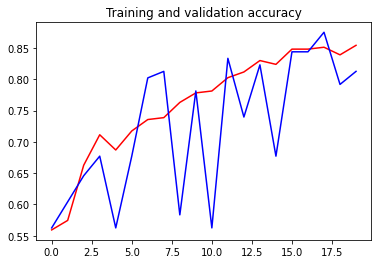

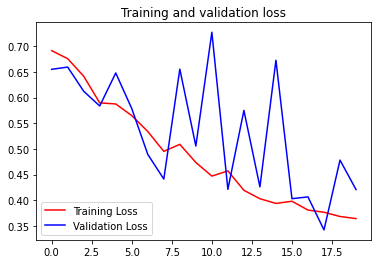

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Saving House_1.jpg to House_1.jpg
Saving House_2.jpg to House_2.jpg
Saving House_3.jpg to House_3.jpg
Saving House_4.jpg to House_4.jpg
Saving House_5.jpg to House_5.jpg
Saving House_6.jpg to House_6.jpg
[0.]
House_1.jpg this building is destroyed.


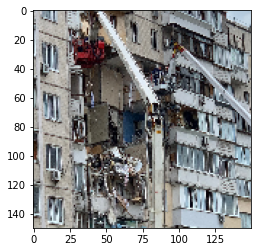

[1.]
House_2.jpg this building is normal.


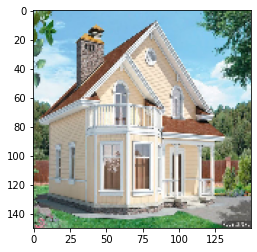

[0.]
House_3.jpg this building is destroyed.


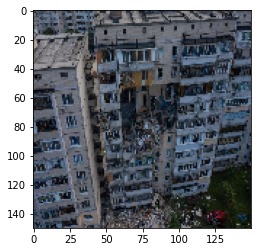

[1.]
House_4.jpg this building is normal.


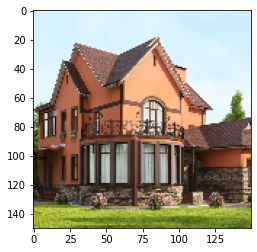

[0.]
House_5.jpg this building is destroyed.


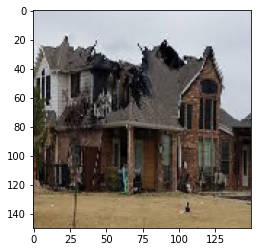

[1.]
House_6.jpg this building is normal.


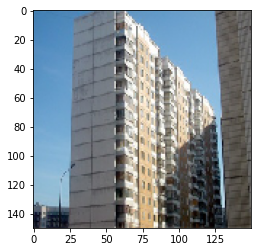

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " this building is normal.")
  else:
    print(fn + " this building is destroyed.")
  
  plt.imshow(img)
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


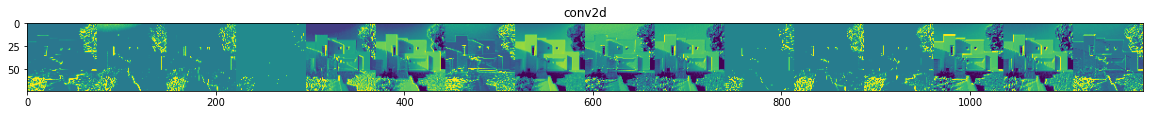

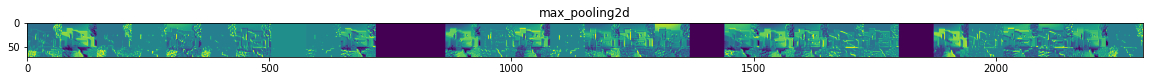

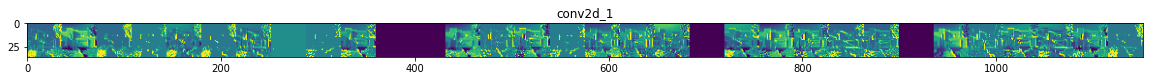

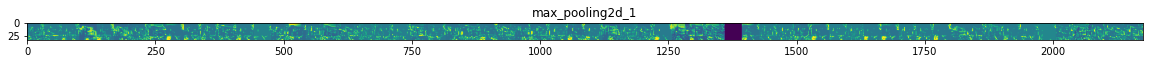

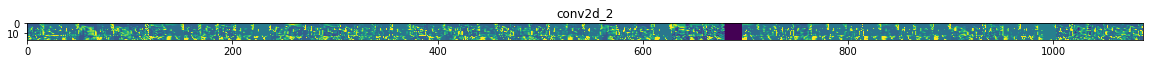

In [ ]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
dest_img_files = [os.path.join(train_dest_dir, f) for f in os.listdir( train_dest_dir )]
norm_img_files = [os.path.join(train_norm_dir, f) for f in os.listdir( train_norm_dir )]

img_path = random.choice(dest_img_files + norm_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 